In [1]:
import pandas as pd
import numpy as np 

dataset = pd.read_csv('higgs.csv')

dataset.head()

c:\users\fredh\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (20,21,22,23,24,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b-tag,...,jet4eta,jet4phi,jet4b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.0,0.30222,0.833048,0.9857,0.978098,0.779732,0.992356,0.798343
1,1,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.0,0.909753,1.10833,0.985692,0.951331,0.803252,0.865924,0.780118
2,0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.0,0.946652,1.028704,0.998656,0.728281,0.8692,1.026736,0.957904
3,1,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.0,0.755856,1.361057,0.98661,0.838085,1.133295,0.872245,0.808487
4,0,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,2.173076,...,-0.654227,-1.274345,3.101961,0.823761,0.938191,0.971758,0.789176,0.430553,0.961357,0.957818


In [2]:
x_columns = [column for column in dataset.columns if column != 'class']

In [3]:
correlation = dataset['class'].corr(dataset['class'])
correlation

1.0

In [4]:
dataset = dataset[dataset['jet4phi']!='?']

In [5]:
object_columns = ['jet4phi','jet4b-tag','m_jj','m_jjj','m_lv','m_jlv','m_bb','m_wbb','m_wwbb']

for column in object_columns:
    dataset[column] = dataset[column].astype('float')
dataset.dropna(inplace=True)

In [6]:
from sklearn.metrics import r2_score

def correlation_checker(column1, column2, df1,df2):
    return r2_score(df1[column1],df2[column2])

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset[x_columns], dataset['class'], test_size = 0.2, random_state = 0)
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

	
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.726
Recall: 0.740
Accuracy: 0.716


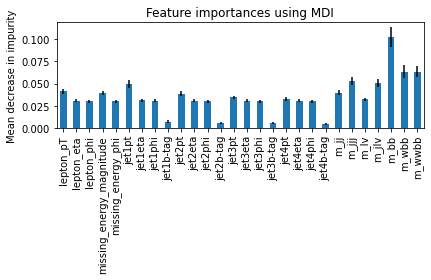

In [8]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
import pandas as pd

forest_importances = pd.Series(importances, index=x_columns)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [9]:
from autofeat import AutoFeatClassifier
#not_wanted_columns = ['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb','class']
not_wanted_columns = ['jet1b-tag','jet2b-tag','jet3b-tag','jet4b-tag','m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb','class']
train = dataset[[column for column in dataset.columns if column not in not_wanted_columns]][:50]
target = dataset['class'][:50]
model = AutoFeatClassifier(verbose=2, feateng_steps=3,featsel_runs=0,n_jobs=-1,transformations = ("exp", "sin","exp-","^2"))
X_train_feature_creation = model.fit_transform(train, target)
#X_test_feature_creation = model.transform(test)
X_train_feature_creation.head()


[AutoFeat] The 3 step feature engineering process could generate up to 29682 features.
[AutoFeat] With 50 data points this new feature matrix would use about 0.01 gb of space.
[feateng] Step 1: transformation of original features
[feateng] Generated 68 transformed features from 17 original features - done.
[feateng] Step 2: first combination of features
[feateng] Generated 14263 feature combinations from 3570 original feature tuples - done.
[feateng] Step 3: transformation of new features
[feateng] Generated 46953 transformed features from 14263 original features - done.
[feateng] Generated altogether 61285 new features in 3 steps
[feateng] Removing correlated features, as well as additions at the highest level
[feateng] Generated a total of 44288 additional features
[AutoFeat] WARNING: Not performing feature selection.
[AutoFeat] Computing 42707 new features.
[AutoFeat] 42707/42707 new features ...done.
[AutoFeat] Final dataframe with 42724 feature columns (42707 new).
[AutoFeat] Trai

0.000051 * exp(jet3phi**2 + exp(-jet1phi))
0.000051 * exp(-missing_energy_phi**2 + exp(lepton_phi))
0.000051 * exp(jet1phi**2 + jet1pt)
0.000051 * exp(jet4eta + sin(jet1pt))
0.000051 * (jet2eta + exp(jet1eta))**2
0.000050 * exp(jet3eta**2 + sin(lepton_phi))
0.000050 * (-jet1phi**2 + exp(-missing_energy_phi))**2
0.000050 * (jet1phi**2 - exp(-missing_energy_phi))**2
0.000050 * exp(missing_energy_phi**2 - sin(missing_energy_phi))
0.000050 * (missing_energy_magnitude - exp(-missing_energy_phi))**2
0.000050 * (-missing_energy_magnitude + exp(-missing_energy_phi))**2
0.000050 * exp(jet1pt**2 - sin(lepton_phi))
0.000050 * (lepton_eta + exp(jet2pt))**2
0.000050 * (exp(lepton_phi) - sin(jet2pt))**2
0.000050 * (-exp(lepton_phi) + sin(jet2pt))**2
0.000050 * exp(jet4eta**2 + exp(-jet2pt))
0.000050 * (lepton_eta - exp(-missing_energy_phi))**2
0.000050 * (-lepton_eta + exp(-missing_energy_phi))**2
0.000050 * exp(lepton_pT + sin(jet4eta))
0.000050 * exp(jet4eta**2 + jet4pt)
0.000050 * exp(jet3eta**2 

0.000038 * (-jet4eta + exp(jet3pt))**2
0.000038 * exp(exp(jet3eta)*exp(-jet3pt))
0.000038 * (jet1eta + jet3eta**2)**2
0.000038 * jet2phi**4*exp(2*jet1pt)
0.000038 * exp(-jet3phi + jet4eta**2)
0.000038 * exp(exp(jet4pt) - sin(lepton_phi))
0.000038 * exp(exp(-jet2pt)*exp(-missing_energy_phi))
0.000038 * (missing_energy_magnitude**2 - exp(jet3phi))**2
0.000038 * (-missing_energy_magnitude**2 + exp(jet3phi))**2
0.000038 * (jet4phi + exp(jet1eta))**2
0.000038 * exp(exp(jet3phi) + sin(missing_energy_magnitude))
0.000038 * (exp(jet3eta) + sin(jet2phi))**2
0.000038 * (exp(jet1pt) + sin(jet4phi))**2
0.000038 * (-exp(jet3eta) + exp(-jet2pt))**2
0.000038 * (exp(jet3eta) - exp(-jet2pt))**2
0.000038 * (jet2phi**2 + exp(missing_energy_phi))**2
0.000038 * exp(exp(jet2phi) - exp(-lepton_phi))
0.000038 * exp(jet4eta + sin(lepton_phi))
0.000038 * exp(jet4eta - sin(jet2eta))
0.000037 * exp(jet3pt + lepton_phi**2)
0.000037 * exp(missing_energy_phi**2 + exp(-jet3pt))
0.000037 * exp(jet4pt**2 + missing_ener

0.000022 * exp(jet1pt + exp(-jet4phi))
0.000022 * exp(exp(-jet2pt)*exp(jet3pt))
0.000022 * exp(lepton_eta + missing_energy_phi**2)
0.000022 * exp(jet3phi + exp(-lepton_eta))
0.000022 * exp(exp(-jet3eta)*sin(jet4eta))
0.000022 * exp(jet2phi**2 + sin(jet3pt))
0.000022 * (jet4eta**2 + sin(jet1eta))**2
0.000022 * (exp(jet3eta) + sin(missing_energy_phi))**2
0.000022 * (jet4eta + exp(-jet3pt))**2
0.000022 * (jet4eta + sin(jet3pt))**2
0.000022 * exp(jet3phi + sin(jet4pt))
0.000022 * exp(-exp(jet4phi)*sin(jet4eta))
0.000022 * (-exp(jet2eta) + sin(lepton_phi))**2
0.000022 * (exp(jet2eta) - sin(lepton_phi))**2
0.000022 * exp(lepton_phi**2*exp(-jet1eta))
0.000022 * (-jet4eta + missing_energy_phi)**2
0.000022 * (jet4eta - missing_energy_phi)**2
0.000022 * (-exp(missing_energy_phi) + exp(-lepton_phi))**2
0.000022 * (exp(missing_energy_phi) - exp(-lepton_phi))**2
0.000022 * (missing_energy_phi - sin(jet1eta))**2
0.000022 * (-missing_energy_phi + sin(jet1eta))**2
0.000022 * (-jet2phi**2 + exp(missing

0.000014 * exp(jet1phi - missing_energy_phi)
0.000014 * exp(jet1phi)*exp(-missing_energy_phi)
0.000014 * (jet2phi + sin(jet3pt))**2
0.000014 * (jet1phi + lepton_pT**2)**2
0.000014 * jet1eta**2*exp(jet4pt)
0.000014 * (jet1pt - sin(missing_energy_phi))**2
0.000014 * (-jet1pt + sin(missing_energy_phi))**2
0.000014 * exp(jet3eta + sin(lepton_eta))
0.000014 * (jet1phi**2 - jet3eta**2)**2
0.000014 * (-jet1phi**2 + jet3eta**2)**2
0.000014 * exp(-jet2pt + exp(-jet2phi))
0.000014 * exp(-jet2pt**2 - missing_energy_phi)
0.000014 * exp(jet3pt**2 - sin(jet2phi))
0.000014 * exp(jet4eta**2 - exp(jet2phi))
0.000014 * (jet2phi**2 + sin(missing_energy_phi))**2
0.000014 * exp(lepton_phi - exp(-jet1eta))
0.000014 * exp(-2*missing_energy_phi)*sin(jet1phi)**2
0.000014 * exp(lepton_pT + exp(lepton_eta))
0.000014 * exp(-jet2pt**2 + exp(-jet3phi))
0.000014 * exp(-jet1eta**2 + missing_energy_magnitude**2)
0.000014 * exp(-jet2phi + jet2pt)
0.000014 * exp(-jet2phi)*exp(jet2pt)
0.000014 * exp(-jet2pt**2 + sin(lept

0.000010 * exp(-jet3phi**2 + missing_energy_phi**2)
0.000010 * exp(-jet2phi*sin(lepton_phi))
0.000010 * sin(jet3pt*exp(lepton_pT))
0.000010 * exp(-jet3eta + exp(-jet4pt))
0.000010 * exp(-exp(-jet2pt) + exp(-jet2phi))
0.000010 * exp(jet4eta**2 - lepton_pT**2)
0.000010 * exp(sin(jet2phi) - sin(jet4phi))
0.000010 * (-exp(jet3eta) + exp(lepton_phi))**2
0.000010 * (exp(jet3eta) - exp(lepton_phi))**2
0.000010 * exp(jet2phi**2 - sin(jet4eta))
0.000010 * exp(exp(jet3phi) - sin(lepton_pT))
0.000010 * exp(jet4eta**2 - lepton_pT)
0.000010 * (jet2pt + sin(missing_energy_phi))**2
0.000010 * -sin(exp(jet4phi) - sin(jet2eta))
0.000010 * sin(exp(jet4phi) - sin(jet2eta))
0.000010 * exp(jet4pt**2 + sin(jet2pt))
0.000010 * exp(jet3eta**2*sin(jet4pt))
0.000010 * sin(exp(jet2phi) + exp(-jet1pt))
0.000010 * jet1eta**2*exp(-jet2phi)
0.000010 * exp(-sin(jet2phi) - sin(jet4phi))
0.000010 * (jet3eta + sin(jet3pt))**2
0.000010 * sin(exp(jet2pt) - exp(jet4phi))
0.000010 * -sin(exp(jet2pt) - exp(jet4phi))
0.000010

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet2pt,jet2eta,...,exp(jet4phi**2 + exp(-jet4phi)),sin(jet4phi**2 + exp(-jet4phi)),exp(-jet4phi**2 - exp(-jet4phi)),sin(jet4phi**2*exp(-jet4phi)),exp(-jet4phi**2*exp(-jet4phi)),-sin(jet4phi**2 - exp(-jet4phi)),exp(jet4phi**2 - exp(-jet4phi)),(-jet4phi**2 + exp(-jet4phi))**2,sin(jet4phi**2 - exp(-jet4phi)),(jet4phi**2 - exp(-jet4phi))**2
0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,0.812581,-0.213642,...,2.720512,0.841914,0.367578,6.714913e-07,0.999999,0.841913,0.367578,1.001638,-0.841913,1.001638
1,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.851737,1.540659,...,3.377758,0.938138,0.296054,3.235765e-01,0.719278,-0.393511,1.498474,0.163578,0.393511,0.163578
2,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,2.423265,-0.676016,...,313.610331,-0.509870,0.003189,8.013570e-01,0.000737,0.888736,0.129120,4.190260,-0.888736,4.190260
3,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.800872,1.020974,...,2.474139,0.786976,0.404181,1.141213e-02,0.988652,0.770953,0.414643,0.774992,-0.770953,0.774992
4,1.595839,-0.607811,0.007075,1.818450,-0.111906,0.847550,-0.566437,1.581239,0.755421,0.643110,...,181.328957,-0.883308,0.005515,-4.576418e-01,0.003004,0.928068,0.141933,3.811877,-0.928068,3.811877


In [10]:
columns_to_be_checked = ['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb','m_wbb', 'm_wwbb']
counter = 0
list_of_corrs = []
for column in X_train_feature_creation.columns:
  for physics_column in columns_to_be_checked:
    score = correlation_checker(column, physics_column, X_train_feature_creation, dataset[:50])
    if score > 0.5:
      print('yuhuu, score:', score)
      list_of_corrs.append((score, X_train_feature_creation[column], dataset[physics_column][:50]))
      print(X_train_feature_creation[column], dataset[physics_column][:50])
      counter+=1
df = pd.DataFrame()
for element in list_of_corrs:
  df[element[1].name] = element[1]
  df[element[2].name] = element[2]
df.to_csv('list_of_corrs1.csv')

yuhuu, score: 0.5122042731719509
0     0.909408
1     1.054327
2     2.941383
3     0.737760
4     0.431530
5     1.105604
6     1.007133
7     4.601550
8     0.861294
9     0.817704
10    0.888340
11    0.348943
12    0.432625
13    0.631642
14    1.111594
15    0.933047
16    1.274889
17    0.633508
18    2.785313
19    0.964841
20    0.419930
21    0.552473
22    1.002506
23    1.145782
24    0.784332
25    1.821268
26    0.120039
27    0.907021
28    0.522082
29    0.765261
30    1.003815
31    1.055962
32    0.671843
33    1.756463
34    1.047754
35    0.906544
36    2.332380
37    1.222181
38    0.545643
39    0.488406
40    2.288360
41    0.619457
42    0.979636
43    0.740118
44    1.557981
45    1.032217
46    1.802786
47    1.256918
48    1.039165
49    0.742252
Name: exp(jet2pt)*exp(-lepton_pT), dtype: float64 0     0.833048
1     1.108330
2     1.028704
3     1.361057
4     0.938191
5     1.222083
6     1.083671
7     4.039273
8     0.773968
9     0.980648
10    1.026261
11

In [ ]:
from autofeat import AutoFeatClassifier
#not_wanted_columns = ['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb','class']
counter = 0
for i in range(10):
    print('Iteration number: ', i)
    not_wanted_columns = ['jet1b-tag','jet2b-tag','jet3b-tag','jet4b-tag','m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb','class']
    train = dataset[[column for column in dataset.columns if column not in not_wanted_columns]][:3000]
    target = dataset['class'][:3000]
    model = AutoFeatClassifier(verbose=2, feateng_steps=2,featsel_runs=0,n_jobs=-1)
    X_train_feature_creation = model.fit_transform(train, target)
    #X_test_feature_creation = model.transform(test)
    X_train_feature_creation.head()

    columns_to_be_checked = ['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb','m_wbb', 'm_wwbb']
    for column in X_train_feature_creation.columns:
        for physics_column in columns_to_be_checked:
            score = abs(correlation_checker(column, physics_column, X_train_feature_creation, dataset))
            if score > 0.75:
                print('yuhuu, score:', score)
                print(X_train_feature_creation[column], dataset[physics_column])
                counter +=1